#**ISOLATION FORESTS - OUTLIER DETECTION**

In [2]:
#IMPORT THE NECESSARY LIBRARIES
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
#setting up some parameters and a random number generator to create sample data
n_samples, n_outliers = 90, 30
rng = np.random.RandomState(0)
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])

In [4]:
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])

The above code cell creates a 2x2 NumPy array named covariance. This matrix will  be used later to introduce correlations/dependencies between the features of the generated data, affecting the shape and orientation of the data clusters.

In [5]:
cluster_1 = 0.4 * rng.randn(n_samples, 2) @ covariance + np.array([2, 2])  # general shape

The above code cell creates a cluster of n_samples data points. It uses the rng.randn function to generate random numbers from a standard normal distribution, scales them by 0.4, applies a transformation using the covariance matrix (introducing correlation), and then shifts the entire cluster by adding the array [2, 2]. The comment # general suggests this cluster might have a more elongated or angled shape due to the covariance matrix.

In [6]:
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])  # spherical shape

Like the previous code cell,this creates another cluster of n_samples data points. It also uses rng.randn but scales by 0.3 and shifts the cluster by adding [-2, -2]. The comment # spherical suggests this cluster will be more circular or spherical because no covariance matrix is applied to introduce correlation.

In [7]:
cluster_3 = 0.4 * rng.randn(n_samples, 2) @ covariance + np.array([2, -3])  # general

In [8]:
#This generates n_outliers data points that are uniformly distributed within the range of -4 to 4 for both dimensions.
#These points will be outside the main clusters and represent outliers.
outliers = rng.uniform(low=-4, high=4, size=(n_outliers, 2))

In [9]:
X = np.concatenate([cluster_1, cluster_2, cluster_3, outliers])

In [10]:
y = np.concatenate(
    [np.ones((3 * n_samples), dtype=int), -np.ones((n_outliers), dtype=int)]
)

The code cell above creates a NumPy array y which serves as labels for the data points, indicating whether each point is a regular sample or an outlier

- **np.ones((2 * n_samples), dtype=int)**: This part creates a NumPy array filled with ones. The size of this array is 2 * n_samples, which corresponds to the total number of data points in cluster_1 and cluster_2 combined. The dtype=int ensures the elements are integers. These ones will label the regular data points.
- **np.ones((n_outliers), dtype=int)**: This part creates a NumPy array filled with negative ones. The size is n_outliers, corresponding to the number of outlier data points. These negative ones will label the outliers.

The **''concatenate''** function then joins the array of ones and the array of negative ones into a single array y.

The y array now contains labels for every data point in the X array, where 1 indicates a regular sample and -1 indicates an outlier.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=64)

 **NOTE:**

 **stratify=y:** This argument ensures that the proportion of outliers (labeled -1) is the same in both the training and testing sets as it is in the original dataset. This is important for outlier detection tasks where the number of outliers is usually much smaller than the number of regular samples.

##**VISUALIZING THE CLUSTERS**

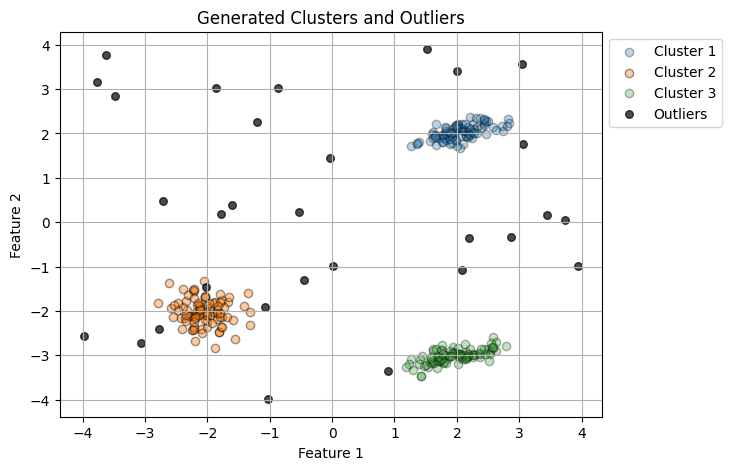

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], label='Cluster 1', alpha=0.3, edgecolors='k')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], label='Cluster 2', alpha=0.4, edgecolors='k')
plt.scatter(cluster_3[:, 0], cluster_3[:, 1], label='Cluster 3', alpha=0.3, edgecolors='k')
plt.scatter(outliers[:, 0], outliers[:, 1], label='Outliers', color='black', alpha=0.7, edgecolors='k', s=30)
plt.title('Generated Clusters and Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside
plt.grid(True)
plt.show()

##**TRAINING THE MODEL**

In [13]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=18)
clf.fit(X_train)

IsolationForest(max_samples=100, random_state=18)

##**VISUALIZING THE DECISON BOUNDARIES**

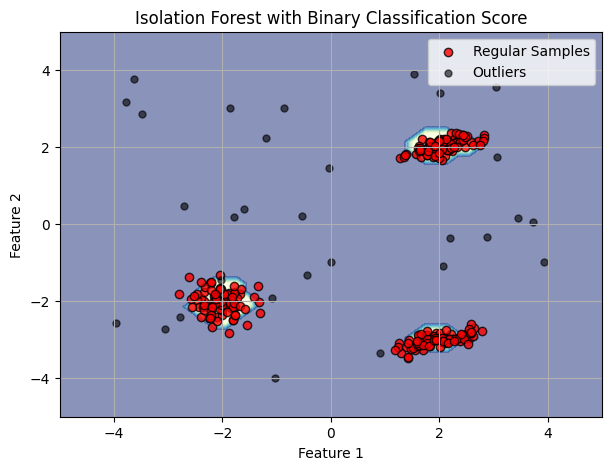

In [14]:
# Plot the decision boundary

from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
# Use the predict method to get -1 for outliers and 1 for inliers
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 5)) # Reduced figure size
contour = plt.contourf(xx, yy, Z, cmap=plt.cm.YlGnBu_r, alpha =0.5) # Capture the contour set object
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Regular Samples', color = 'red', alpha=0.8, edgecolors='k')
plt.scatter(X[y == -1, 0], X[y == -1, 1], label='Outliers',color = 'black', alpha=0.6, edgecolors='k', s = 25)
plt.title('Isolation Forest with Binary Classification Score')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

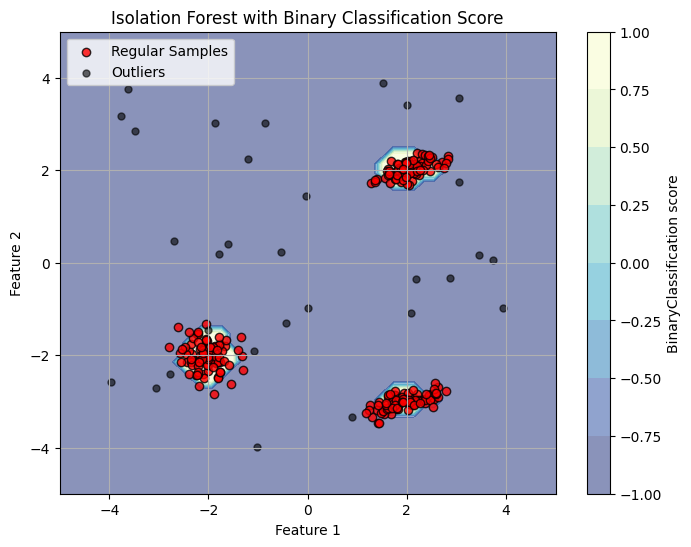

In [15]:
# Plot the decision boundary
import matplotlib.pyplot as plt
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
# Use the predict method to get -1 for outliers and 1 for inliers
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6)) # Reduced figure size
contour = plt.contourf(xx, yy, Z, cmap=plt.cm.YlGnBu_r, alpha =0.5) # Capture the contour set object
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Regular Samples', color = 'red', alpha=0.8, edgecolors='k')
plt.scatter(X[y == -1, 0], X[y == -1, 1], label='Outliers',color = 'black', alpha=0.6, edgecolors='k', s = 25)
plt.title('Isolation Forest with Binary Classification Score')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.colorbar(contour, label='BinaryClassification score') # Add color bar using the contour set object
plt.show()

##**Anomaly Scoring and the Decision Path Length**

The Decision Value Function, or Anomaly Score, in the context of an Isolation Forest is a metric that quantifies how "anomalous" a data point is. Here's a breakdown of the concept:

###**How Isolation Forests Work:**
Isolation Forests work by randomly partitioning the data space. Outliers, being fewer and different from the majority of the data, are more likely to be isolated in fewer random partitions (i.e., they will be closer to the root of the "isolation trees"). Regular data points, being more clustered, will require more partitions (i.e., they will be further down the trees).

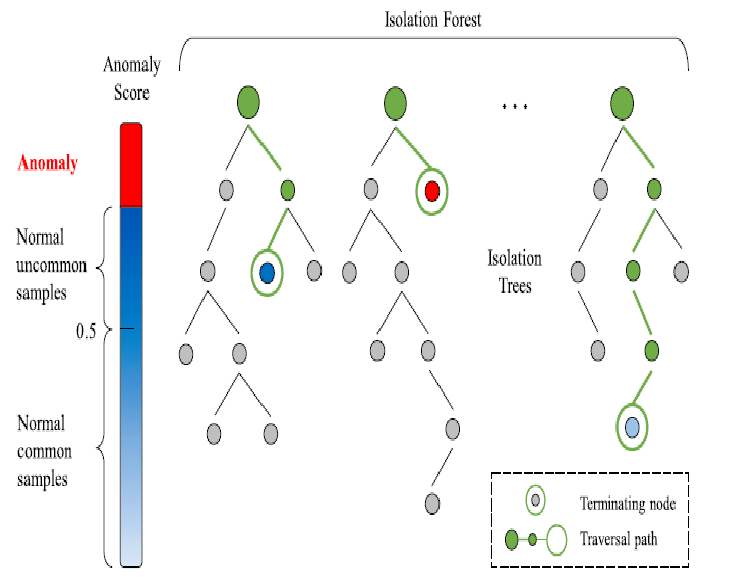





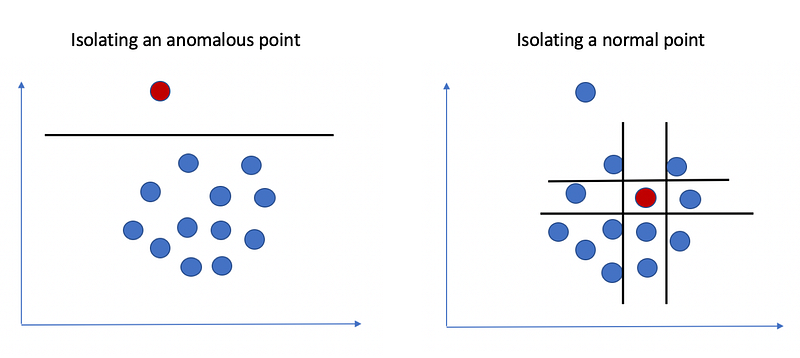

**NOTICE: how in the figure above, we can isolate an anomalous point from the rest of the data with just one line, while the normal point on the right requires four lines to isolate completely.**



##**THE "DECISON VALUE FUNCTION"**

The Score: The Decision Value Function essentially measures how "easy" it was to isolate a given data point.


**1) Lower scores:** Indicate that the data point was isolated quickly (closer to the root of the trees). This suggests the point is an outlier.

**2) Higher scores:** Indicate that the data point required more partitions to be isolated (further from the root). This suggests the point is a regular data point.
**Interpretation:** The contour plot you see visualizes these anomaly scores across the entire data space.
* Regions with lower (more negative) decision function values -  are considered more likely to contain outliers.
* Regions with higher (more positive) decision function values -  are considered more likely to contain regular data points.
* The contour lines represent different thresholds of the anomaly score. You can think of these lines as boundaries where the model's decision changes from classifying a point as an outlier to classifying it as a regular data point, or vice versa.
In summary, the Decision Value Function provides a continuous measure of how isolated a data point is within the dataset, serving as the core mechanism for an Isolation Forest to identify anomalies

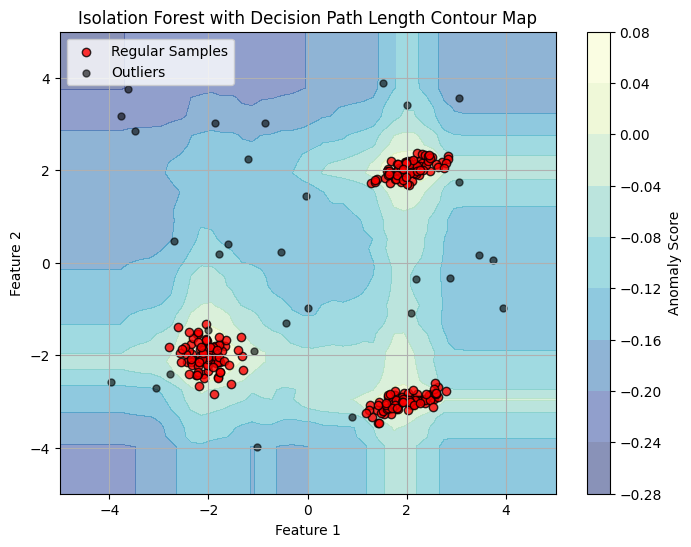

In [16]:
# Plot the decision boundary
import matplotlib.pyplot as plt
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6)) # Reduced figure size
contour = plt.contourf(xx, yy, Z, cmap=plt.cm.YlGnBu_r, alpha =0.5) # Capture the contour set object
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Regular Samples', color = 'red', alpha=0.8, edgecolors='k')
plt.scatter(X[y == -1, 0], X[y == -1, 1], label='Outliers',color = 'black', alpha=0.6, edgecolors='k', s = 25)
plt.title('Isolation Forest with Decision Path Length Contour Map')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.colorbar(contour, label='Anomaly Score') # Add color bar using the contour set object
plt.show()

/tmp/ipython-input-2261497368.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


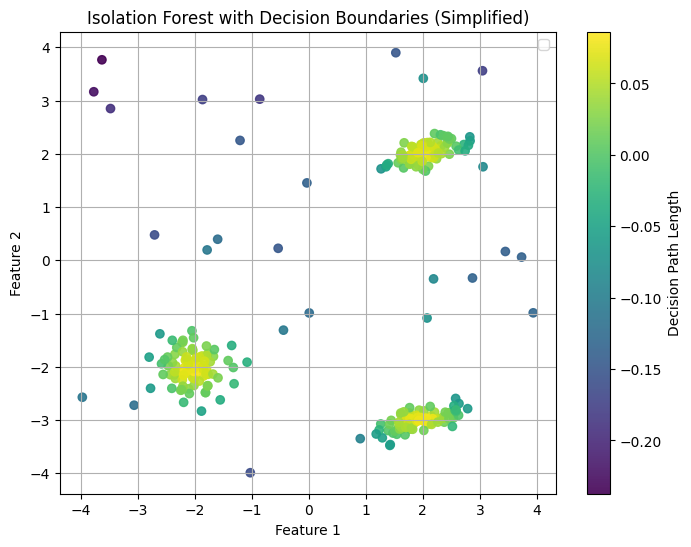

In [78]:
plt.figure(figsize=(8, 6)) # Reduced figure size
# Calculate anomaly scores for all data points
pred_scores = clf.decision_function(X)
plt.scatter(X[:, 0], X[:, 1], c=pred_scores, cmap='viridis', alpha = 0.9)
plt.title('Isolation Forest with Decision Boundaries (Simplified)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.colorbar(label='Decision Path Length')
plt.show()

##**DISCUSSION**

##**What is the difference between  "clf.predict" and "clf.decision_function" ?**


In the context of the IsolationForest in scikit-learn, clf.predict and clf.decision_function provide different types of outputs related to the anomaly detection.

clf.decision_function(X): This method returns the anomaly score for each data point in X. The anomaly score is a continuous value. As explained in the markdown cell, lower scores indicate a higher likelihood of being an outlier, and higher scores indicate a higher likelihood of being a regular data point. This score is based on the average path length from the root of the isolation trees to the data point.
clf.predict(X): This method returns a binary classification for each data point in X. It uses a threshold on the anomaly score to classify each point as either an inlier or an outlier. By convention in scikit-learn's outlier detection models, predict returns:
1 for inliers (regular data points).
-1 for outliers.
In essence, decision_function gives you a continuous measure of "outlierness", while predict gives you a discrete classification based on that measure. The predict method applies a default threshold to the anomaly scores to make the binary decision.

##**EVALUATING MODEL PERFORMANCE**

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.53      1.00      0.70         8
           1       1.00      0.90      0.94        67

    accuracy                           0.91        75
   macro avg       0.77      0.95      0.82        75
weighted avg       0.95      0.91      0.92        75


Confusion Matrix:
[[ 8  0]
 [ 7 60]]


##**CONFUSION MATRIX ILLUSTRATION**

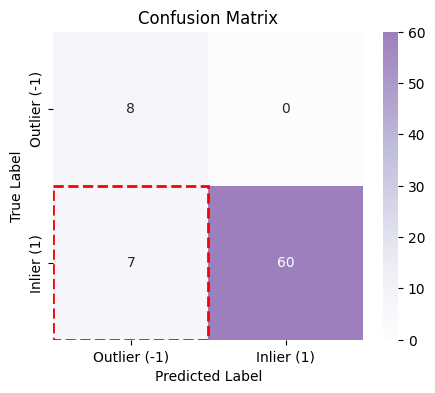

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', alpha = 0.5, cbar=True,
            xticklabels=['Outlier (-1)', 'Inlier (1)'], yticklabels=['Outlier (-1)', 'Inlier (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Highlight misclassifications with red rectangles
ax = plt.gca() # Get the current axes
# Highlight False Positives (True Label: Inlier, Predicted Label: Outlier)
# This corresponds to the bottom-left cell in the confusion matrix
rect = plt.Rectangle((0, 1), 1, 1, fill=False, edgecolor='red', lw=2, linestyle='dashed')
ax.add_patch(rect)
plt.show()

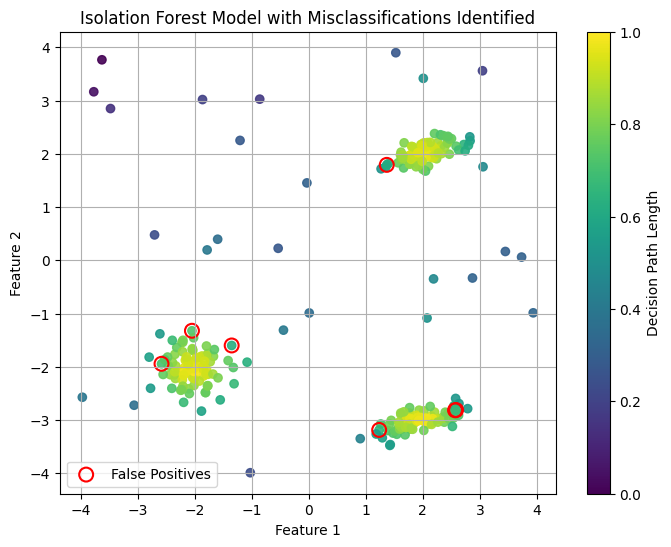

In [85]:
plt.figure(figsize=(8, 6)) # Reduced figure size
# Calculate anomaly scores for all data points
pred_scores = clf.decision_function(X)
plt.scatter(X[:, 0], X[:, 1], c=pred_scores, cmap='viridis', alpha = 0.9)

# Identify false positives (actual inliers, predicted outliers)
# In this case, actual inliers have y=1 and predicted outliers have y_pred=-1
false_positives_indices = np.where((y_test == 1) & (y_pred == -1))[0]
false_positives = X_test[false_positives_indices]

# Highlight false positives with red circles
plt.scatter(false_positives[:, 0], false_positives[:, 1], facecolors='none', edgecolors='red', s=100, label='False Positives', linewidth=1.5)


plt.title('Isolation Forest Model with Misclassifications Identified')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='lower left')  # Place legend at the bottom left inside the plot
plt.grid(True)
plt.colorbar(label='Decision Path Length')
plt.show()

##**CONCLUSION**

Based on the plot showing the anomaly scores (related to decision path length) and the highlighted false positives (inliers misclassified as outliers), we can observe the following:

*   The false positive points, which are actual inliers, have anomaly scores that are closer to the boundary region between the inliers and outliers (the transition zone in the color bar).
*   While they are closer to the inlier clusters, their anomaly scores are lower than the scores of the points deep within the inlier clusters.
*   This suggests that even though these points belong to the regular clusters, their position relative to the random splits in the Isolation Forest trees resulted in slightly shorter average path lengths compared to the core inlier points, leading to their misclassification as outliers.
*   This highlights that the decision boundary is not perfectly crisp and there can be some ambiguity for points near the edges of the clusters or in sparser regions within the clusters.